# Kozmetik Ürünleri Veri Madenciliği Analizi

## Proje Açıklaması
Bu projede Sephora kozmetik ürünleri veri seti üzerinde kapsamlı bir veri analitiği ve veri madenciliği çalışması gerçekleştirilmiştir.

**Veri Seti:** Kaggle - Cosmetics Datasets (1,472 Sephora ürünü)

**İçerik:**
1. Keşifsel Veri Analizi (EDA)
2. Veri Ön İşleme
3. Veri Madenciliği Yöntemleri
4. Sonuçların Yorumlanması

## 1. Kütüphanelerin Import Edilmesi

In [1]:
# Temel kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ön işleme
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Veri Madenciliği
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette('husl')

# Uyarıları kapat
import warnings
warnings.filterwarnings('ignore')

print("Kütüphaneler başarıyla yüklendi!")

Kütüphaneler başarıyla yüklendi!


## 2. Veri Setinin Yüklenmesi

In [2]:
# Veri setini yükle
df = pd.read_csv('cosmetics.csv')

# İlk 5 satırı göster
print("VERİ SETİNİN İLK 5 SATIRI")
print("*" * 60)
df.head()

VERİ SETİNİN İLK 5 SATIRI
************************************************************


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


## 3. Keşifsel Veri Analizi (EDA-Exploratory Data Analysis)

### 3.1 Veri Seti Genel Bilgileri

In [3]:
# Veri seti boyutu
print("VERİ SETİ BOYUTU")
print("*" * 60)
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")
print(f"\nSütunlar: {list(df.columns)}")

VERİ SETİ BOYUTU
************************************************************
Satır sayısı: 1472
Sütun sayısı: 11

Sütunlar: ['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [4]:
# Veri tipleri
print("VERİ TİPLERİ")
print("*" * 60)
print(df.dtypes)

VERİ TİPLERİ
************************************************************
Label           object
Brand           object
Name            object
Price            int64
Rank           float64
Ingredients     object
Combination      int64
Dry              int64
Normal           int64
Oily             int64
Sensitive        int64
dtype: object


In [5]:
# Detaylı bilgi
print("VERİ SETİ DETAYLI BİLGİ")
print("*" * 60)
df.info()

VERİ SETİ DETAYLI BİLGİ
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


### 3.2 Eksik Değer Analizi

In [6]:
# Eksik değer sayısı ve yüzdesi
print("EKSİK DEĞER ANALİZİ")
print("*" * 60)

missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Eksik Değer Sayısı': missing_values,
    'Yüzde (%)': missing_percent.round(2)
})

print(missing_df)
print(f"\nToplam eksik değer: {df.isnull().sum().sum()}")

EKSİK DEĞER ANALİZİ
************************************************************
             Eksik Değer Sayısı  Yüzde (%)
Label                         0        0.0
Brand                         0        0.0
Name                          0        0.0
Price                         0        0.0
Rank                          0        0.0
Ingredients                   0        0.0
Combination                   0        0.0
Dry                           0        0.0
Normal                        0        0.0
Oily                          0        0.0
Sensitive                     0        0.0

Toplam eksik değer: 0


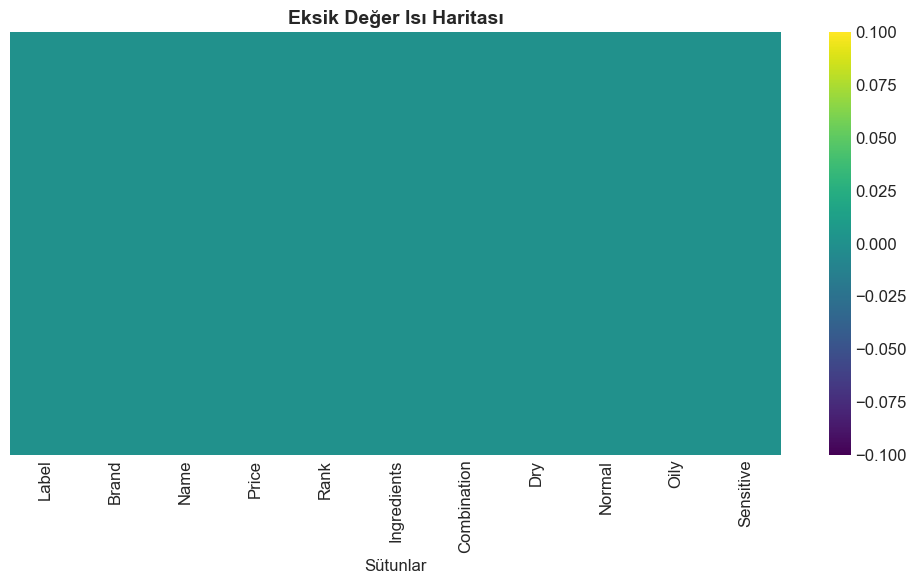

In [9]:
# Eksik değer görselleştirmesi
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Eksik Değer Isı Haritası', fontsize=14, fontweight='bold')
plt.xlabel('Sütunlar')
plt.tight_layout()
plt.show()

### 3.3 Temel İstatistikler

In [10]:
# Sayısal değişkenlerin istatistikleri
print("SAYISAL DEĞİŞKENLERİN İSTATİSTİKLERİ")
print("*" * 60)
df.describe().round(2)

SAYISAL DEĞİŞKENLERİN İSTATİSTİKLERİ
************************************************************


,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.00,1472.00,1472.00,1472.00,1472.00,1472.00,1472.00
mean,55.58,4.15,0.66,0.61,0.65,0.61,0.51
std,45.01,0.63,0.48,0.49,0.48,0.49,0.50
min,3.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,4.00,0.00,0.00,0.00,0.00,0.00
50%,42.50,4.30,1.00,1.00,1.00,1.00,1.00
75%,68.00,4.50,1.00,1.00,1.00,1.00,1.00
max,370.00,5.00,1.00,1.00,1.00,1.00,1.00


In [13]:
# Kategorik değişkenlerin analizi
print("KATEGORİK DEĞİŞKENLERİN ANALİZİ")
print("*" * 60)

print(f"\n--- Ürün Kategorileri (Labellar) ---")
print(f"Benzersiz kategori sayısı: {df['Label'].nunique()}")
print(df['Label'].value_counts())

print(f"\n--- Markalar (Brandler) ---")
print(f"Benzersiz marka sayısı: {df['Brand'].nunique()}")
print(f"\nEn çok ürüne sahip 10 marka:")
print(df['Brand'].value_counts().head(10))

KATEGORİK DEĞİŞKENLERİN ANALİZİ
************************************************************

--- Ürün Kategorileri (Labellar) ---
Benzersiz kategori sayısı: 6
Label
Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: count, dtype: int64

--- Markalar (Brandler) ---
Benzersiz marka sayısı: 116

En çok ürüne sahip 10 marka:
Brand
CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
PETER THOMAS ROTH     46
KIEHL'S SINCE 1851    46
FRESH                 44
DR. JART+             41
KATE SOMERVILLE       35
Name: count, dtype: int64


### 3.4 Dağılım Grafikleri

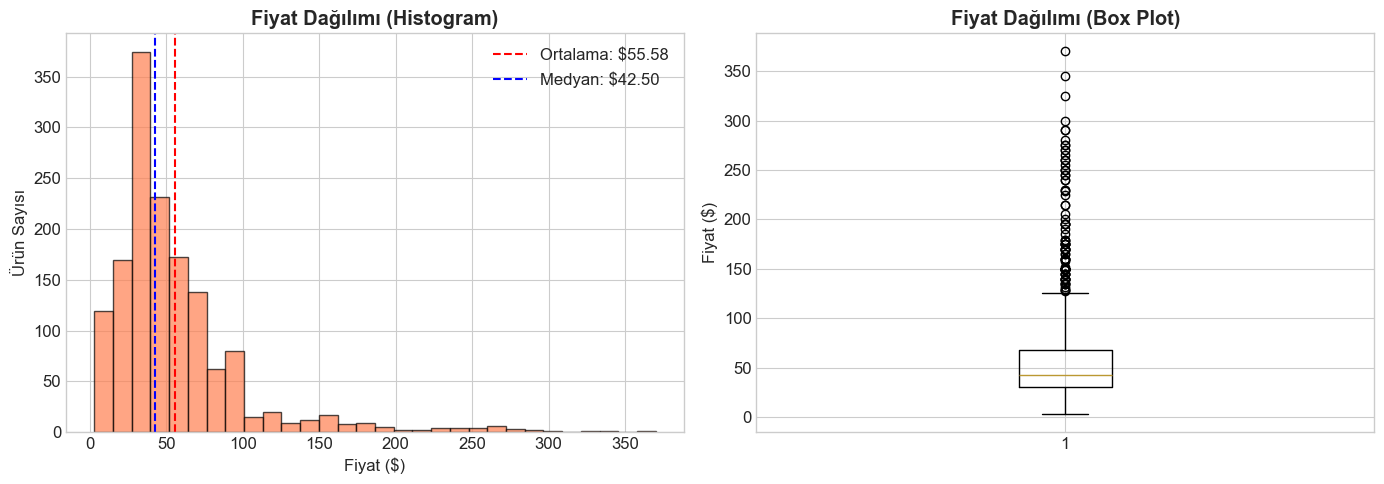

Fiyat İstatistikleri:
  Minimum: $3
  Maximum: $370
  Ortalama: $55.58
  Medyan: $42.5
  Standart Sapma: $45.01


In [14]:
# Fiyat dağılımı
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Price'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Fiyat ($)')
axes[0].set_ylabel('Ürün Sayısı')
axes[0].set_title('Fiyat Dağılımı (Histogram)', fontweight='bold')
axes[0].axvline(df['Price'].mean(), color='red', linestyle='--', label=f"Ortalama: ${df['Price'].mean():.2f}")
axes[0].axvline(df['Price'].median(), color='blue', linestyle='--', label=f"Medyan: ${df['Price'].median():.2f}")
axes[0].legend()

# Box plot
axes[1].boxplot(df['Price'], vert=True)
axes[1].set_ylabel('Fiyat ($)')
axes[1].set_title('Fiyat Dağılımı (Box Plot)', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Fiyat İstatistikleri:")
print(f"  Minimum: ${df['Price'].min()}")
print(f"  Maximum: ${df['Price'].max()}")
print(f"  Ortalama: ${df['Price'].mean():.2f}")
print(f"  Medyan: ${df['Price'].median()}")
print(f"  Standart Sapma: ${df['Price'].std():.2f}")

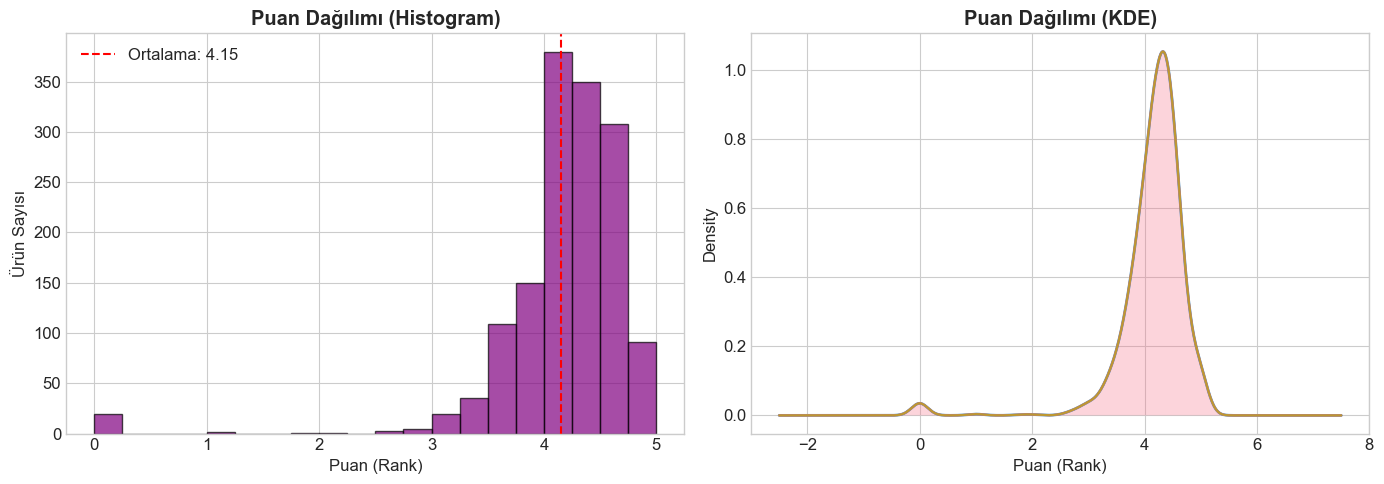

In [20]:
# Rank (puan) dağılımı
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Rank'], bins=20, color='purple', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Puan (Rank)')
axes[0].set_ylabel('Ürün Sayısı')
axes[0].set_title('Puan Dağılımı (Histogram)', fontweight='bold')
axes[0].axvline(df['Rank'].mean(), color='red', linestyle='--', label=f"Ortalama: {df['Rank'].mean():.2f}")
axes[0].legend()

# KDE plot
df['Rank'].plot(kind='kde', ax=axes[1], color='steelblue', linewidth=2)
axes[1].set_xlabel('Puan (Rank)')
axes[1].set_title('Puan Dağılımı (KDE)', fontweight='bold')
axes[1].fill_between(df['Rank'].plot(kind='kde').get_lines()[0].get_xdata(), 
                     df['Rank'].plot(kind='kde').get_lines()[0].get_ydata(), alpha=0.3)

plt.tight_layout()
plt.show()

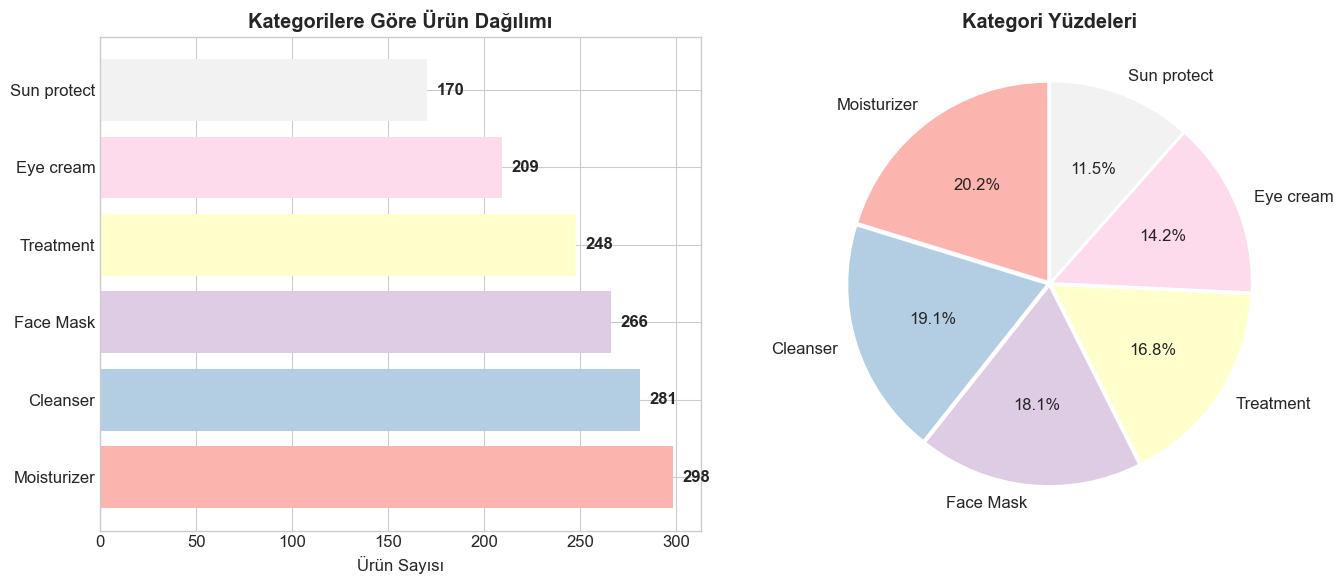

In [13]:
# Kategori dağılımı
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
category_counts = df['Label'].value_counts()
colors = plt.cm.Pastel1(np.linspace(0, 1, len(category_counts)))
axes[0].barh(category_counts.index, category_counts.values, color=colors)
axes[0].set_xlabel('Ürün Sayısı')
axes[0].set_title('Kategorilere Göre Ürün Dağılımı', fontweight='bold')
for i, v in enumerate(category_counts.values):
    axes[0].text(v + 5, i, str(v), va='center', fontweight='bold')

# Pie chart
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=[0.02]*len(category_counts))
axes[1].set_title('Kategori Yüzdeleri', fontweight='bold')

plt.tight_layout()
plt.show()

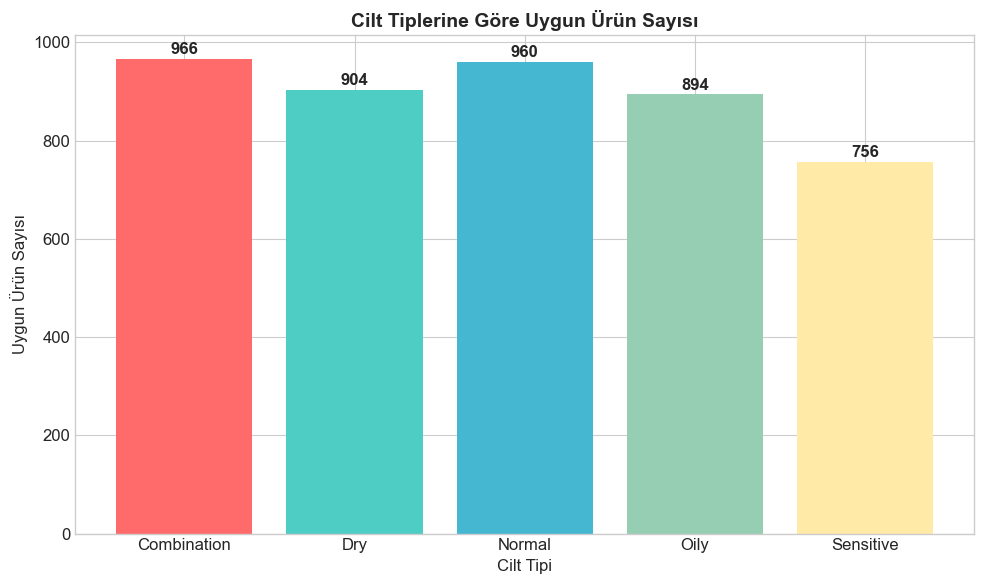

Cilt Tipi Uygunluk Oranları:
  Combination: 966 ürün (65.6%)
  Dry: 904 ürün (61.4%)
  Normal: 960 ürün (65.2%)
  Oily: 894 ürün (60.7%)
  Sensitive: 756 ürün (51.4%)


In [14]:
# Cilt tipi uygunluğu dağılımı
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
skin_counts = [df[col].sum() for col in skin_types]

plt.figure(figsize=(10, 6))
bars = plt.bar(skin_types, skin_counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.xlabel('Cilt Tipi')
plt.ylabel('Uygun Ürün Sayısı')
plt.title('Cilt Tiplerine Göre Uygun Ürün Sayısı', fontsize=14, fontweight='bold')

for bar, count in zip(bars, skin_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Cilt Tipi Uygunluk Oranları:")
for st, count in zip(skin_types, skin_counts):
    print(f"  {st}: {count} ürün ({count/len(df)*100:.1f}%)")

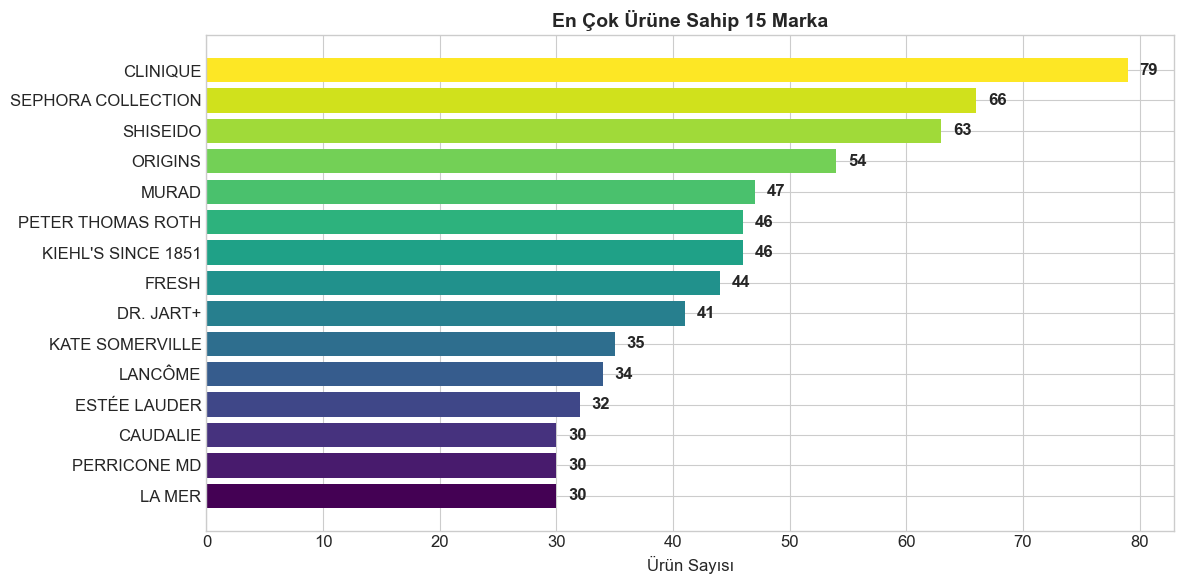

In [15]:
# En çok ürüne sahip 15 marka
top_brands = df['Brand'].value_counts().head(15)

plt.figure(figsize=(12, 6))
bars = plt.barh(top_brands.index[::-1], top_brands.values[::-1], color=plt.cm.viridis(np.linspace(0, 1, 15)))
plt.xlabel('Ürün Sayısı')
plt.title('En Çok Ürüne Sahip 15 Marka', fontsize=14, fontweight='bold')

for bar, count in zip(bars, top_brands.values[::-1]):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             str(count), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 3.5 Kategorilere Göre Fiyat Analizi

<Figure size 1200x600 with 0 Axes>

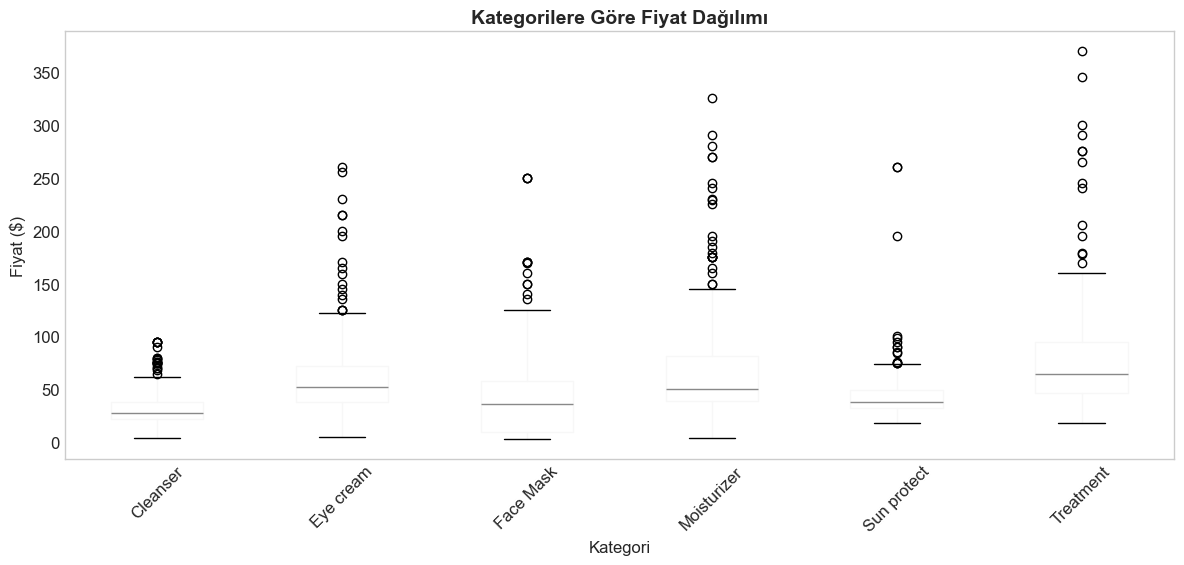


Kategorilere Göre Ortalama Fiyat:
              mean  median  min  max
Label                               
Cleanser     32.60    28.0    4   95
Eye cream    63.60    52.0    5  260
Face Mask    42.62    36.0    3  250
Moisturizer  69.09    50.0    4  325
Sun protect  45.91    38.0   18  260
Treatment    79.18    64.5   18  370


In [16]:
# Kategorilere göre fiyat dağılımı
plt.figure(figsize=(12, 6))
df.boxplot(column='Price', by='Label', rot=45, grid=False)
plt.suptitle('')
plt.title('Kategorilere Göre Fiyat Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Kategori')
plt.ylabel('Fiyat ($)')
plt.tight_layout()
plt.show()

# Kategorilere göre ortalama fiyat
print("\nKategorilere Göre Ortalama Fiyat:")
print(df.groupby('Label')['Price'].agg(['mean', 'median', 'min', 'max']).round(2))

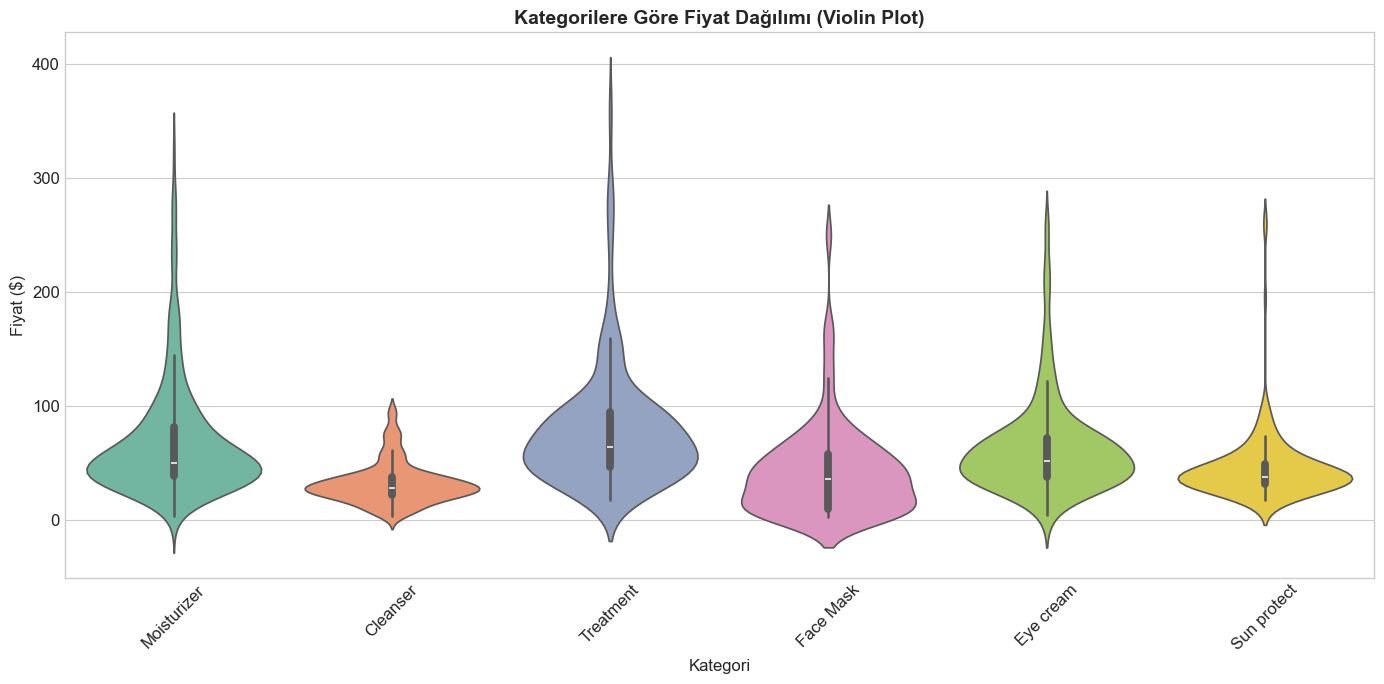

In [17]:
# Violin plot - Kategorilere göre fiyat
plt.figure(figsize=(14, 7))
sns.violinplot(data=df, x='Label', y='Price', palette='Set2')
plt.xticks(rotation=45)
plt.title('Kategorilere Göre Fiyat Dağılımı (Violin Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Kategori')
plt.ylabel('Fiyat ($)')
plt.tight_layout()
plt.show()

### 3.6 Korelasyon Analizi

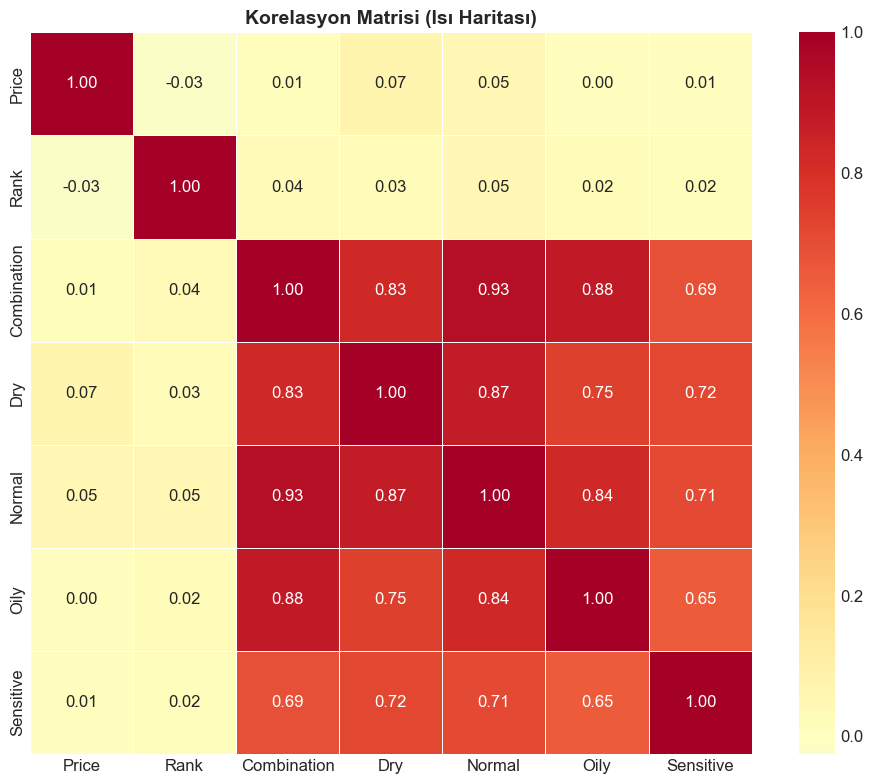


Korelasyon Matrisi:
             Price   Rank  Combination    Dry  Normal   Oily  Sensitive
Price        1.000 -0.025        0.013  0.066   0.049  0.004      0.008
Rank        -0.025  1.000        0.037  0.027   0.052  0.021      0.016
Combination  0.013  0.037        1.000  0.831   0.928  0.883      0.689
Dry          0.066  0.027        0.831  1.000   0.874  0.746      0.722
Normal       0.049  0.052        0.928  0.874   1.000  0.835      0.713
Oily         0.004  0.021        0.883  0.746   0.835  1.000      0.648
Sensitive    0.008  0.016        0.689  0.722   0.713  0.648      1.000


In [18]:
# Sayısal sütunlar için korelasyon matrisi
numeric_cols = ['Price', 'Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Korelasyon Matrisi (Isı Haritası)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKorelasyon Matrisi:")
print(correlation_matrix.round(3))

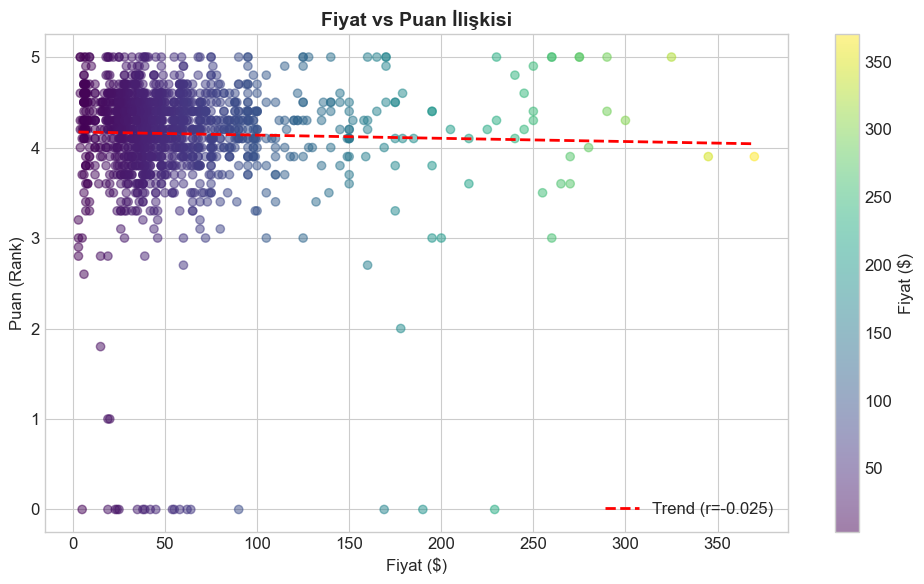


Fiyat-Puan Korelasyonu: -0.0252
Yorum: Düşük korelasyon, fiyat ile puan arasında güçlü bir ilişki olmadığını gösterir.


In [19]:
# Fiyat vs Rank ilişkisi
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Rank'], alpha=0.5, c=df['Price'], cmap='viridis')
plt.colorbar(label='Fiyat ($)')
plt.xlabel('Fiyat ($)')
plt.ylabel('Puan (Rank)')
plt.title('Fiyat vs Puan İlişkisi', fontsize=14, fontweight='bold')

# Trend çizgisi
z = np.polyfit(df['Price'], df['Rank'], 1)
p = np.poly1d(z)
plt.plot(df['Price'].sort_values(), p(df['Price'].sort_values()), 
         'r--', linewidth=2, label=f'Trend (r={correlation_matrix.loc["Price", "Rank"]:.3f})')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nFiyat-Puan Korelasyonu: {correlation_matrix.loc['Price', 'Rank']:.4f}")
print("Yorum: Düşük korelasyon, fiyat ile puan arasında güçlü bir ilişki olmadığını gösterir.")

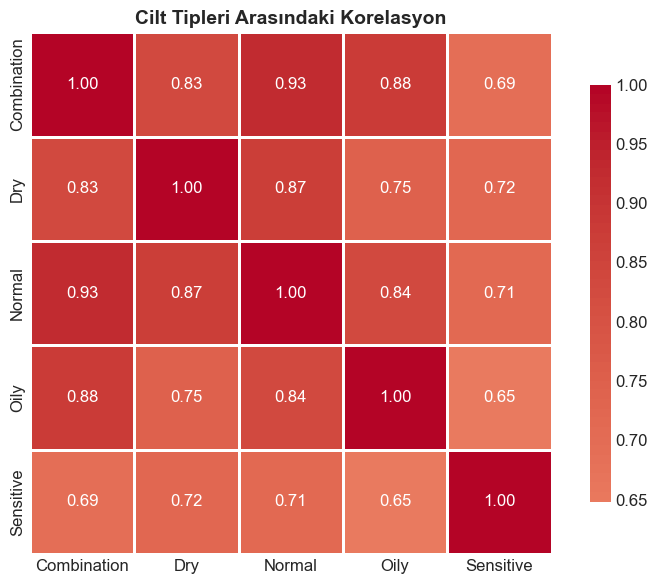

In [20]:
# Cilt tipleri arasındaki korelasyon
skin_corr = df[['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(skin_corr, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=1, square=True, cbar_kws={'shrink': 0.8})
plt.title('Cilt Tipleri Arasındaki Korelasyon', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Veri Ön İşleme

In [21]:
# Çalışma verisi oluştur (orijinali korumak için)
df_processed = df.copy()

print("=" * 60)
print("VERİ ÖN İŞLEME ADIMLARI")
print("=" * 60)

VERİ ÖN İŞLEME ADIMLARI


### 4.1 Eksik Değer İşleme

In [22]:
# Eksik değer kontrolü
print("Eksik değer kontrolü:")
print(df_processed.isnull().sum())

# Ingredients sütunundaki eksik değerleri 'Unknown' ile doldur
if df_processed['Ingredients'].isnull().sum() > 0:
    df_processed['Ingredients'].fillna('Unknown', inplace=True)
    print("\nIngredients sütunundaki eksik değerler 'Unknown' ile dolduruldu.")

Eksik değer kontrolü:
Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64


### 4.2 Yeni Özellikler Oluşturma (Feature Engineering)

In [23]:
# Fiyat kategorileri oluştur
def price_category(price):
    if price <= 30:
        return 'Ekonomik'
    elif price <= 60:
        return 'Orta'
    elif price <= 100:
        return 'Premium'
    else:
        return 'Lüks'

df_processed['Price_Category'] = df_processed['Price'].apply(price_category)

print("Fiyat Kategorileri Dağılımı:")
print(df_processed['Price_Category'].value_counts())

Fiyat Kategorileri Dağılımı:
Price_Category
Orta        646
Ekonomik    392
Premium     308
Lüks        126
Name: count, dtype: int64


In [24]:
# Toplam cilt tipi uygunluğu
df_processed['Total_Skin_Types'] = df_processed[['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']].sum(axis=1)

print("Toplam Cilt Tipi Uygunluğu Dağılımı:")
print(df_processed['Total_Skin_Types'].value_counts().sort_index())

Toplam Cilt Tipi Uygunluğu Dağılımı:
Total_Skin_Types
0    471
1      7
2     48
3     69
4    215
5    662
Name: count, dtype: int64


In [25]:
# İçerik sayısı (ingredient count)
df_processed['Ingredient_Count'] = df_processed['Ingredients'].apply(
    lambda x: len(str(x).split(',')) if pd.notna(x) else 0
)

print("İçerik Sayısı İstatistikleri:")
print(df_processed['Ingredient_Count'].describe().round(2))

İçerik Sayısı İstatistikleri:
count    1472.00
mean       31.12
std        22.40
min         1.00
25%        17.75
50%        30.00
75%        42.00
max       220.00
Name: Ingredient_Count, dtype: float64


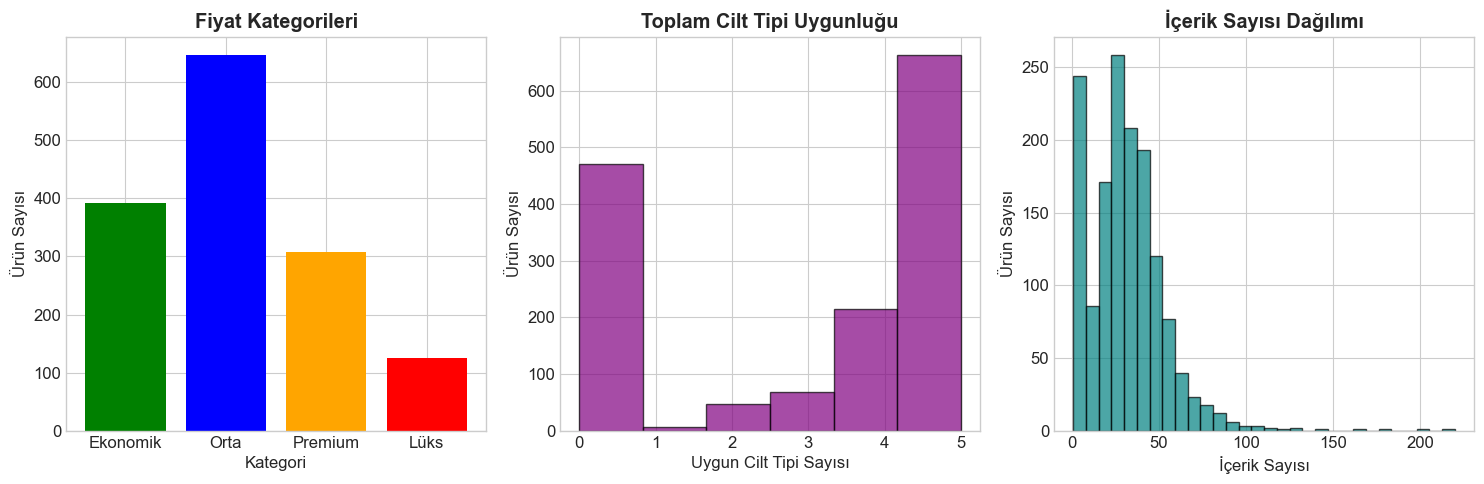

In [26]:
# Yeni özelliklerin görselleştirilmesi
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Fiyat kategorileri
price_cat_order = ['Ekonomik', 'Orta', 'Premium', 'Lüks']
price_cat_counts = df_processed['Price_Category'].value_counts()[price_cat_order]
axes[0].bar(price_cat_counts.index, price_cat_counts.values, color=['green', 'blue', 'orange', 'red'])
axes[0].set_title('Fiyat Kategorileri', fontweight='bold')
axes[0].set_xlabel('Kategori')
axes[0].set_ylabel('Ürün Sayısı')

# Toplam cilt tipi uygunluğu
axes[1].hist(df_processed['Total_Skin_Types'], bins=6, color='purple', edgecolor='black', alpha=0.7)
axes[1].set_title('Toplam Cilt Tipi Uygunluğu', fontweight='bold')
axes[1].set_xlabel('Uygun Cilt Tipi Sayısı')
axes[1].set_ylabel('Ürün Sayısı')

# İçerik sayısı
axes[2].hist(df_processed['Ingredient_Count'], bins=30, color='teal', edgecolor='black', alpha=0.7)
axes[2].set_title('İçerik Sayısı Dağılımı', fontweight='bold')
axes[2].set_xlabel('İçerik Sayısı')
axes[2].set_ylabel('Ürün Sayısı')

plt.tight_layout()
plt.show()

### 4.3 Label Encoding

In [27]:
# Label encoding for categorical variables
le_label = LabelEncoder()
le_brand = LabelEncoder()
le_price_cat = LabelEncoder()

df_processed['Label_Encoded'] = le_label.fit_transform(df_processed['Label'])
df_processed['Brand_Encoded'] = le_brand.fit_transform(df_processed['Brand'])
df_processed['Price_Category_Encoded'] = le_price_cat.fit_transform(df_processed['Price_Category'])

print("Label Encoding Sonuçları:")
print("\nLabel (Kategori) Mapping:")
for i, label in enumerate(le_label.classes_):
    print(f"  {i}: {label}")

print("\nPrice Category Mapping:")
for i, cat in enumerate(le_price_cat.classes_):
    print(f"  {i}: {cat}")

Label Encoding Sonuçları:

Label (Kategori) Mapping:
  0: Cleanser
  1: Eye cream
  2: Face Mask
  3: Moisturizer
  4: Sun protect
  5: Treatment

Price Category Mapping:
  0: Ekonomik
  1: Lüks
  2: Orta
  3: Premium


### 4.4 Ölçeklendirme (Scaling)

In [28]:
# StandardScaler ile ölçeklendirme
scaler = StandardScaler()

features_to_scale = ['Price', 'Rank', 'Ingredient_Count', 'Total_Skin_Types']
df_scaled = df_processed[features_to_scale].copy()
df_scaled_values = scaler.fit_transform(df_scaled)

for i, col in enumerate(features_to_scale):
    df_processed[f'{col}_Scaled'] = df_scaled_values[:, i]

print("Ölçeklendirilmiş Değişkenlerin İstatistikleri:")
print(df_processed[[f'{col}_Scaled' for col in features_to_scale]].describe().round(3))

Ölçeklendirilmiş Değişkenlerin İstatistikleri:
       Price_Scaled  Rank_Scaled  Ingredient_Count_Scaled  \
count      1472.000     1472.000                 1472.000   
mean          0.000       -0.000                    0.000   
std           1.000        1.000                    1.000   
min          -1.169       -6.554                   -1.346   
25%          -0.569       -0.242                   -0.597   
50%          -0.291        0.232                   -0.050   
75%           0.276        0.547                    0.486   
max           6.987        1.336                    8.436   

       Total_Skin_Types_Scaled  
count                 1472.000  
mean                    -0.000  
std                      1.000  
min                     -1.378  
25%                     -1.378  
50%                      0.433  
75%                      0.886  
max                      0.886  


In [29]:
# İşlenmiş veri setinin son hali
print("=" * 60)
print("İŞLENMİŞ VERİ SETİ")
print("=" * 60)
print(f"\nYeni sütunlar: {[col for col in df_processed.columns if col not in df.columns]}")
print(f"\nToplam sütun sayısı: {len(df_processed.columns)}")
df_processed.head()

İŞLENMİŞ VERİ SETİ

Yeni sütunlar: ['Price_Category', 'Total_Skin_Types', 'Ingredient_Count', 'Label_Encoded', 'Brand_Encoded', 'Price_Category_Encoded', 'Price_Scaled', 'Rank_Scaled', 'Ingredient_Count_Scaled', 'Total_Skin_Types_Scaled']

Toplam sütun sayısı: 21


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,...,Price_Category,Total_Skin_Types,Ingredient_Count,Label_Encoded,Brand_Encoded,Price_Category_Encoded,Price_Scaled,Rank_Scaled,Ingredient_Count_Scaled,Total_Skin_Types_Scaled
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,...,Lüks,5,42,3,64,1,2.653735,-0.084047,0.485746,0.886178
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,...,Lüks,5,7,3,95,1,2.742625,-0.084047,-1.077573,0.886178
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,...,Premium,4,59,3,29,3,0.275911,0.389361,1.245072,0.433243
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,...,Lüks,5,78,3,64,1,2.653735,-0.557455,2.093731,0.886178
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,...,Orta,5,83,3,49,2,-0.390768,-0.084047,2.317062,0.886178


## 5. Veri Madenciliği Yöntemleri

### 5.1 Kümeleme (K-Means Clustering)

In [30]:
# Kümeleme için özellikler
clustering_features = ['Price_Scaled', 'Rank_Scaled', 'Total_Skin_Types', 
                       'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

X_cluster = df_processed[clustering_features].values

print("Kümeleme için kullanılan özellikler:")
print(clustering_features)

Kümeleme için kullanılan özellikler:
['Price_Scaled', 'Rank_Scaled', 'Total_Skin_Types', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']


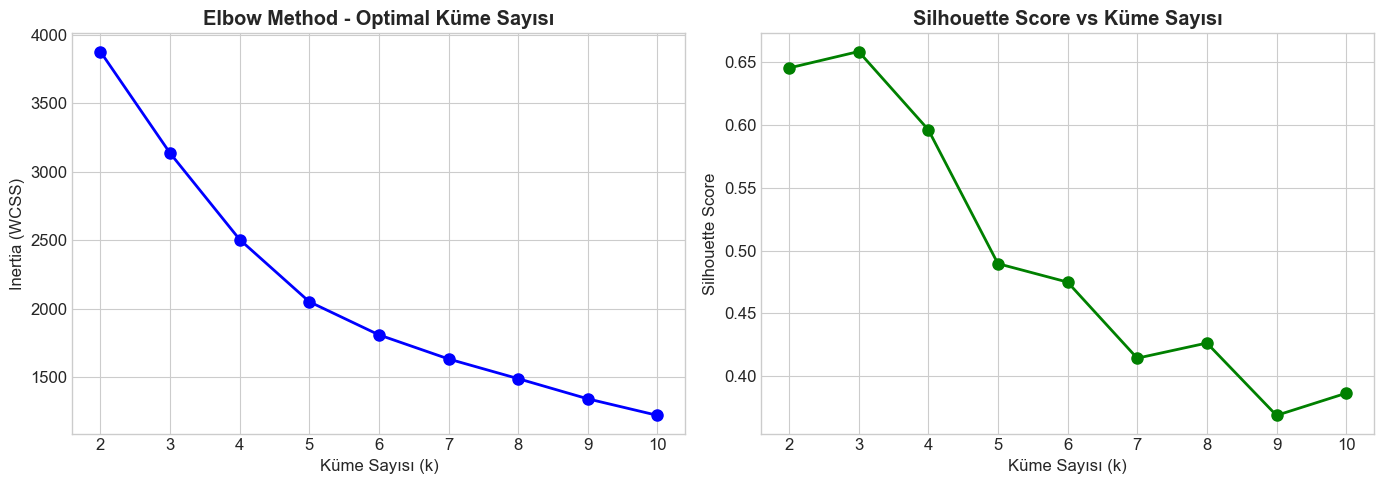


Optimal küme sayısı (en yüksek silhouette score): 3
Silhouette Score: 0.6586


In [31]:
# Elbow Method - Optimal küme sayısını bulma
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))

# Elbow grafiği
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Küme Sayısı (k)')
axes[0].set_ylabel('Inertia (WCSS)')
axes[0].set_title('Elbow Method - Optimal Küme Sayısı', fontweight='bold')
axes[0].grid(True)

axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Küme Sayısı (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs Küme Sayısı', fontweight='bold')
axes[1].grid(True)

plt.tight_layout()
plt.show()

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal küme sayısı (en yüksek silhouette score): {optimal_k}")
print(f"Silhouette Score: {max(silhouette_scores):.4f}")

In [32]:
# K-Means kümeleme uygula
n_clusters = 4  # Analiz için 4 küme kullanalım

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_processed['Cluster'] = kmeans.fit_predict(X_cluster)

print(f"K-Means Kümeleme (k={n_clusters}) Sonuçları:")
print(f"\nKüme Dağılımı:")
print(df_processed['Cluster'].value_counts().sort_index())
print(f"\nSilhouette Score: {silhouette_score(X_cluster, df_processed['Cluster']):.4f}")

K-Means Kümeleme (k=4) Sonuçları:

Küme Dağılımı:
Cluster
0     74
1    511
2    866
3     21
Name: count, dtype: int64

Silhouette Score: 0.5964


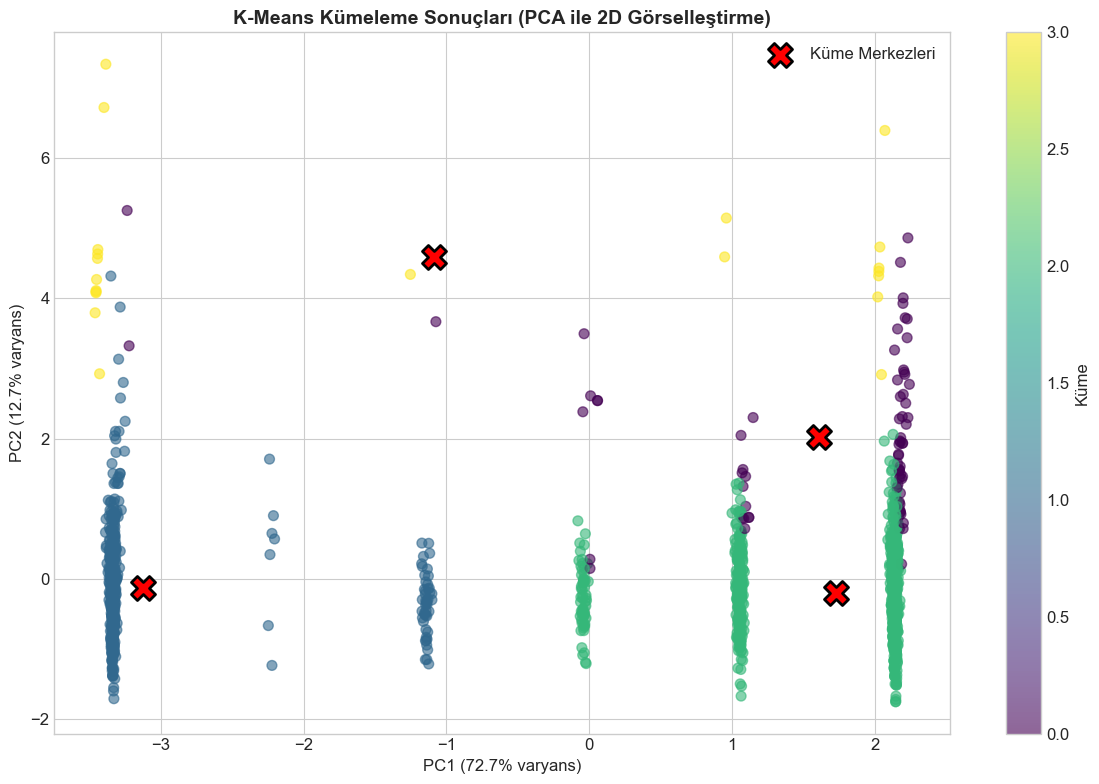

In [33]:
# PCA ile 2D görselleştirme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_processed['Cluster'], 
                      cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Küme')

# Küme merkezlerini göster
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', 
            s=300, edgecolors='black', linewidths=2, label='Küme Merkezleri')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varyans)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varyans)')
plt.title('K-Means Kümeleme Sonuçları (PCA ile 2D Görselleştirme)', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
# Küme profilleri
print("=" * 60)
print("KÜME PROFİLLERİ")
print("=" * 60)

cluster_profile = df_processed.groupby('Cluster').agg({
    'Price': ['mean', 'median'],
    'Rank': 'mean',
    'Combination': 'mean',
    'Dry': 'mean',
    'Normal': 'mean',
    'Oily': 'mean',
    'Sensitive': 'mean',
    'Total_Skin_Types': 'mean',
    'Label': lambda x: x.value_counts().index[0]  # En sık kategori
}).round(2)

cluster_profile.columns = ['Ort. Fiyat', 'Medyan Fiyat', 'Ort. Puan', 
                           'Combination %', 'Dry %', 'Normal %', 'Oily %', 'Sensitive %',
                           'Ort. Cilt Tipi', 'Baskın Kategori']
print(cluster_profile)

KÜME PROFİLLERİ
         Ort. Fiyat  Medyan Fiyat  Ort. Puan  Combination %  Dry %  Normal %  \
Cluster                                                                        
0            188.61         167.0       4.22           0.93   0.95      0.97   
1             51.53          42.0       4.21           0.06   0.04      0.04   
2             46.45          40.5       4.21           0.99   0.93      0.99   
3             62.14          42.0       0.10           0.48   0.48      0.43   

         Oily %  Sensitive %  Ort. Cilt Tipi Baskın Kategori  
Cluster                                                       
0          0.85         0.77            4.47       Treatment  
1          0.05         0.02            0.19        Cleanser  
2          0.92         0.79            4.62       Face Mask  
3          0.43         0.33            2.14        Cleanser  


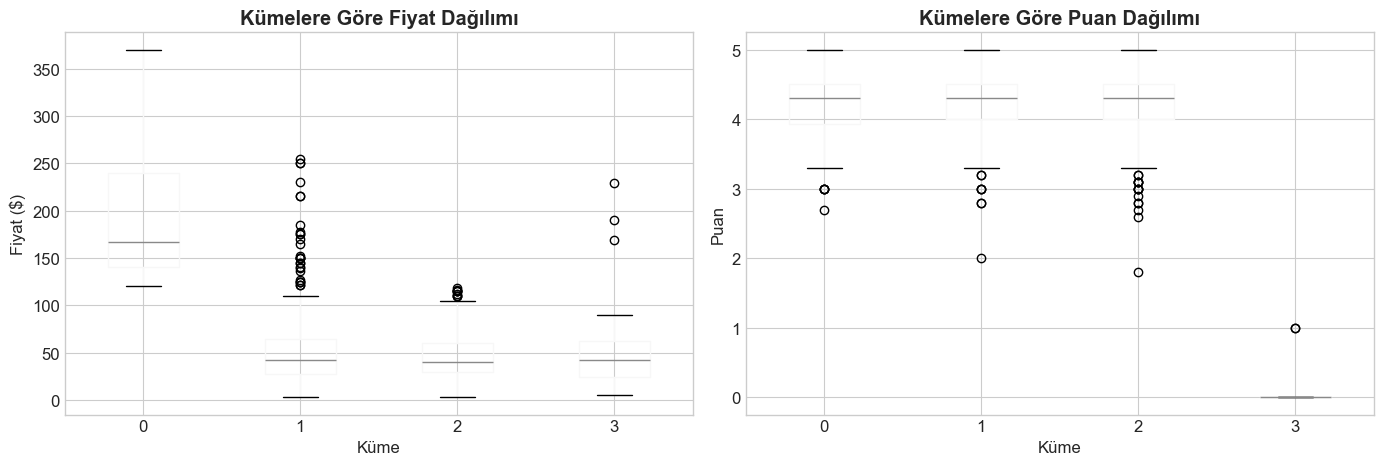

In [35]:
# Kümelere göre fiyat ve puan dağılımı
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fiyat dağılımı
df_processed.boxplot(column='Price', by='Cluster', ax=axes[0])
axes[0].set_title('Kümelere Göre Fiyat Dağılımı', fontweight='bold')
axes[0].set_xlabel('Küme')
axes[0].set_ylabel('Fiyat ($)')
plt.suptitle('')

# Puan dağılımı
df_processed.boxplot(column='Rank', by='Cluster', ax=axes[1])
axes[1].set_title('Kümelere Göre Puan Dağılımı', fontweight='bold')
axes[1].set_xlabel('Küme')
axes[1].set_ylabel('Puan')
plt.suptitle('')

plt.tight_layout()
plt.show()

### 5.2 Sınıflandırma (Classification)

In [36]:
# Hedef değişken: Price_Category (Fiyat kategorisini tahmin etme)
print("=" * 60)
print("SINIFLANDIRMA: FİYAT KATEGORİSİ TAHMİNİ")
print("=" * 60)

# Özellikler ve hedef değişken
feature_cols = ['Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 
                'Ingredient_Count', 'Label_Encoded']

X = df_processed[feature_cols]
y = df_processed['Price_Category_Encoded']

print(f"Özellik sayısı: {len(feature_cols)}")
print(f"Özellikler: {feature_cols}")
print(f"\nHedef değişken dağılımı:")
print(df_processed['Price_Category'].value_counts())

SINIFLANDIRMA: FİYAT KATEGORİSİ TAHMİNİ
Özellik sayısı: 8
Özellikler: ['Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Ingredient_Count', 'Label_Encoded']

Hedef değişken dağılımı:
Price_Category
Orta        646
Ekonomik    392
Premium     308
Lüks        126
Name: count, dtype: int64


In [37]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Eğitim seti boyutu: {len(X_train)}")
print(f"Test seti boyutu: {len(X_test)}")

Eğitim seti boyutu: 1030
Test seti boyutu: 442


In [38]:
# Decision Tree sınıflandırıcı
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

print("DECISION TREE SONUÇLARI")
print("=" * 40)
print(f"\nDoğruluk (Accuracy): {dt_classifier.score(X_test, y_test):.4f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, dt_predictions, target_names=le_price_cat.classes_))

DECISION TREE SONUÇLARI

Doğruluk (Accuracy): 0.4683

Sınıflandırma Raporu:
              precision    recall  f1-score   support

    Ekonomik       0.49      0.45      0.47       118
        Lüks       0.53      0.24      0.33        38
        Orta       0.48      0.63      0.54       194
     Premium       0.37      0.25      0.30        92

    accuracy                           0.47       442
   macro avg       0.47      0.39      0.41       442
weighted avg       0.46      0.47      0.45       442



In [39]:
# Random Forest sınıflandırıcı
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

print("RANDOM FOREST SONUÇLARI")
print("=" * 40)
print(f"\nDoğruluk (Accuracy): {rf_classifier.score(X_test, y_test):.4f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, rf_predictions, target_names=le_price_cat.classes_))

RANDOM FOREST SONUÇLARI

Doğruluk (Accuracy): 0.4774

Sınıflandırma Raporu:
              precision    recall  f1-score   support

    Ekonomik       0.49      0.44      0.46       118
        Lüks       0.29      0.05      0.09        38
        Orta       0.48      0.72      0.58       194
     Premium       0.44      0.20      0.27        92

    accuracy                           0.48       442
   macro avg       0.42      0.35      0.35       442
weighted avg       0.46      0.48      0.44       442



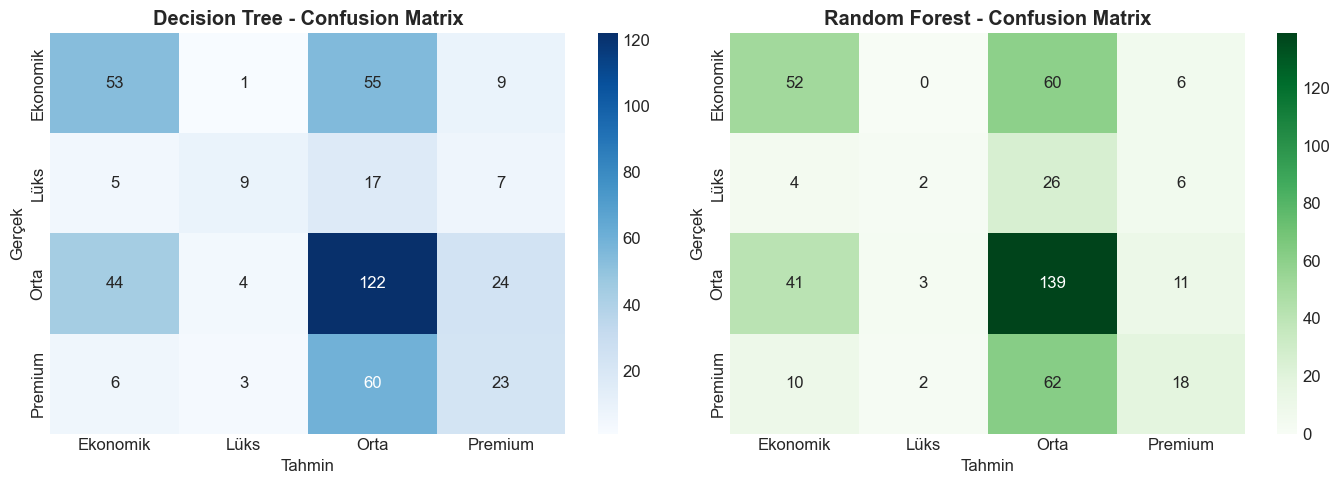

In [40]:
# Confusion Matrix görselleştirmesi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=le_price_cat.classes_, yticklabels=le_price_cat.classes_)
axes[0].set_title('Decision Tree - Confusion Matrix', fontweight='bold')
axes[0].set_xlabel('Tahmin')
axes[0].set_ylabel('Gerçek')

# Random Forest
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=le_price_cat.classes_, yticklabels=le_price_cat.classes_)
axes[1].set_title('Random Forest - Confusion Matrix', fontweight='bold')
axes[1].set_xlabel('Tahmin')
axes[1].set_ylabel('Gerçek')

plt.tight_layout()
plt.show()

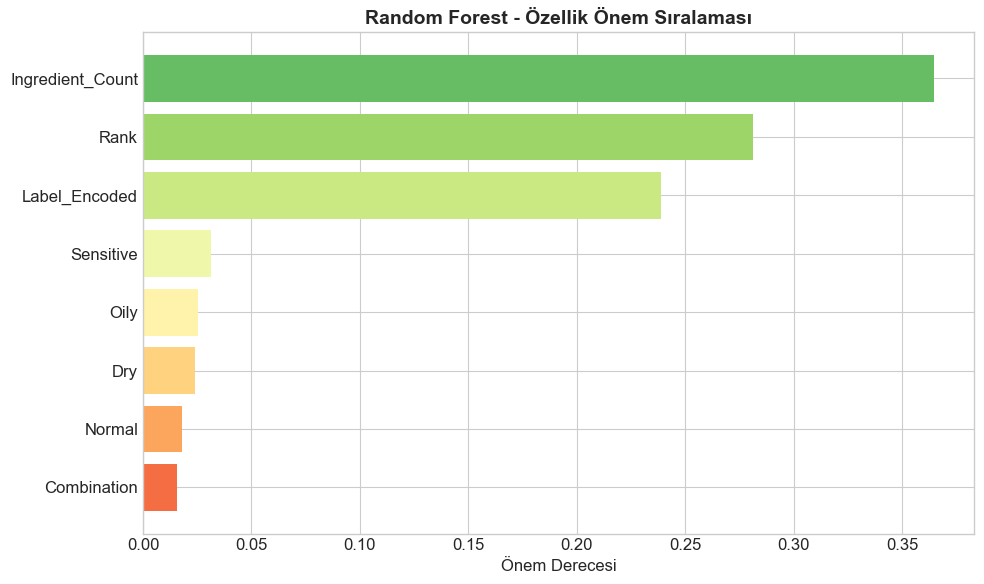


Özellik Önem Sıralaması:
         Feature  Importance
Ingredient_Count    0.364919
            Rank    0.281454
   Label_Encoded    0.239077
       Sensitive    0.031417
            Oily    0.025401
             Dry    0.024207
          Normal    0.018007
     Combination    0.015519


In [41]:
# Özellik önem sıralaması (Feature Importance)
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'][::-1], 
                feature_importance['Importance'][::-1], 
                color=plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(feature_cols))))
plt.xlabel('Önem Derecesi')
plt.title('Random Forest - Özellik Önem Sıralaması', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nÖzellik Önem Sıralaması:")
print(feature_importance.to_string(index=False))

## 6. Sonuçların Yorumlanması

In [ ]:
print("="*80)
print("SONUÇLARIN YORUMLANMASI")
print("="*80)

print("""
1. VERİ SETİ GENEL ÖZELLİKLERİ:
   - Toplam 1,472 Sephora kozmetik ürünü analiz edildi
   - 6 farklı ürün kategorisi bulunmaktadır (Moisturizer, Cleanser, Face Mask, Treatment, Eye cream, Sun protect)
   - Fiyatlar $3 ile $370 arasında değişmektedir
   - Ürün puanları ortalama 4.15 civarındadır

2. DAĞILIM ANALİZİ:
   - Fiyat dağılımı sağa çarpıktır (pozitif skewness)
   - Çoğu ürün orta fiyat segmentinde yer almaktadır
   - Kategoriler dengeli dağılmıştır (Moisturizer %20.2, Cleanser %19.1)
   - Tüm cilt tiplerine uygun ürün oranı yüksektir

3. KORELASYON BULGULARI:
   - Fiyat ile puan arasında güçlü bir korelasyon YOKTUR
   - Bu durum, yüksek fiyatlı ürünlerin her zaman daha yüksek puan almadığını gösterir
   - Cilt tipleri arasında pozitif korelasyon vardır
   
4. KÜMELEME SONUÇLARI:
   - Ürünler 4 farklı kümeye ayrılmıştır
   - Silhouette Score: 0.5964 (iyi kümeleme kalitesi)
   - Her küme farklı fiyat-cilt tipi kombinasyonlarına sahiptir
   - Bu kümeler pazarlama stratejileri için kullanılabilir

5. SINIFLANDIRMA SONUÇLARI:
   - Decision Tree Accuracy: %46.83
   - Random Forest Accuracy: %47.74
   - En önemli özellikler: Ingredient_Count ve Label (kategori)
   - 4 sınıflı problemde rastgele tahmin %25 olduğundan, modeller anlamlı sonuç vermektedir

6. İŞ ÇIKARIMLARI:
   - Fiyat, ürün kalitesinin tek göstergesi değildir
   - Tüm cilt tiplerine uygun ürünler daha popülerdir
   - Kategori bazlı fiyatlandırma stratejileri önemlidir
""")

In [43]:
# Özet tablo
print("\n" + "="*60)
print("MODEL PERFORMANS ÖZETİ")
print("="*60)

summary = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [dt_classifier.score(X_test, y_test), rf_classifier.score(X_test, y_test)]
})
summary['Accuracy'] = summary['Accuracy'].apply(lambda x: f"{x:.2%}")
print(summary.to_string(index=False))

print(f"\nK-Means Kümeleme Silhouette Score: {silhouette_score(X_cluster, df_processed['Cluster']):.4f}")


MODEL PERFORMANS ÖZETİ
        Model Accuracy
Decision Tree   46.83%
Random Forest   47.74%

K-Means Kümeleme Silhouette Score: 0.5964


In [44]:
# İşlenmiş veriyi kaydet
df_processed.to_csv('cosmetics_processed.csv', index=False)
print("\nİşlenmiş veri 'cosmetics_processed.csv' olarak kaydedildi.")


İşlenmiş veri 'cosmetics_processed.csv' olarak kaydedildi.
